<a href="https://colab.research.google.com/github/priyanshdatyal/TensorFlow-Notes-With-Code/blob/main/Topic_19_EvaluatingPredictionsWithRegressionMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Depending upon the p[roblem e have diffeent methods to evaluate the prection model

Since we are working with roblem

MAE = mean absoklute error : on average error how accurate is each maplotlib

MSE = square the average error

In [48]:

X = tf.range(-100,100,4)
y=X+10
lengthTrain =len(X)*0.8
X,y

X_train = X[:int(lengthTrain)]
X_test = X[int(lengthTrain):]


y_train = y[:int(lengthTrain)]
y_test = y[int(lengthTrain):]
plt.figure(figsize=(10, 7))
# Plot training data in blue
# plt.scatter(X_train, y_train, c='g', label='Training data')
# # Plot test data in green
# plt.scatter(X_test, y_test, c='r', label='Testing data')
# # Show the legend
# plt.legend();

tf.random.set_seed(42)
model = tf.keras.Sequential([
                  tf.keras.layers.Dense(7,input_shape=[1]),
                  tf.keras.layers.Dense(1,input_shape=[1])
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

# model.summary()
model.fit(X_train,y_train,epochs=100,verbose=0)
y_predicted=model.predict(X_test)
y_predicted

array([[ 69.4904  ],
       [ 74.01089 ],
       [ 78.53137 ],
       [ 83.05186 ],
       [ 87.57235 ],
       [ 92.092834],
       [ 96.61331 ],
       [101.133804],
       [105.65429 ],
       [110.174774]], dtype=float32)

<Figure size 720x504 with 0 Axes>

In [32]:

def plotGraph(
              xt=X_train,
              yt=y_train,
              ytst=y_test,
              xtst=X_test,
              predicted=y_predicted
              ):
  plt.figure(figsize=(10, 7))
  plt.scatter(xt, yt, c="g", label="Training data")
  plt.scatter(xtst, ytst, c="r", label="Testing data")
  plt.scatter(ytst, predicted, c="b", label="Predicted Data")
  plt.legend();

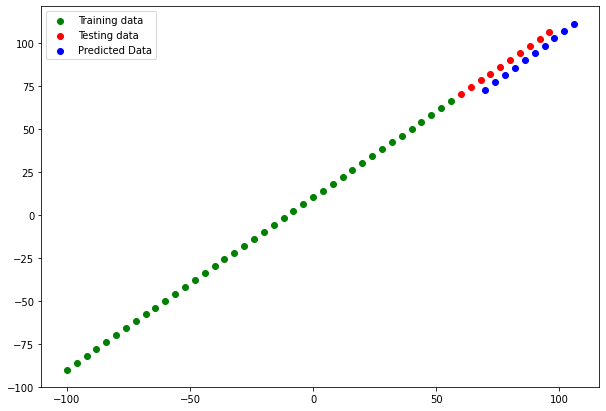

In [49]:
plotGraph()

In [34]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 112ms/step - loss: 3.8340 - mae: 3.8340


[3.833991289138794, 3.833991289138794]

In [35]:
y_test,tf.constant(y_predicted)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 72.60887],
        [ 76.88112],
        [ 81.15337],
        [ 85.42562],
        [ 89.69787],
        [ 93.97011],
        [ 98.24236],
        [102.51461],
        [106.78686],
        [111.05911]], dtype=float32)>)

In [36]:
# Compute mean absolute error 

mae = tf.metrics.mean_absolute_error(y_test,y_pred=tf.constant(y_predicted))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.912903, 13.071329, 11.138651, 10.114876, 10.      , 10.794022,
       12.545418, 15.211688, 18.786858, 23.059113], dtype=float32)>

In [37]:
y_test-y_predicted

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ -2,   2,   6,  10,  14,  18,  22,  26,  30,  34],
       [ -6,  -2,   2,   6,  10,  14,  18,  22,  26,  30],
       [-11,  -7,  -3,   1,   5,   9,  13,  17,  21,  25],
       [-15, -11,  -7,  -3,   1,   5,   9,  13,  17,  21],
       [-19, -15, -11,  -7,  -3,   1,   5,   9,  13,  17],
       [-23, -19, -15, -11,  -7,  -3,   1,   5,   9,  13],
       [-28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8],
       [-32, -28, -24, -20, -16, -12,  -8,  -4,   0,   4],
       [-36, -32, -28, -24, -20, -16, -12,  -8,  -4,   0],
       [-41, -37, -33, -29, -25, -21, -17, -13,  -9,  -5]], dtype=int32)>

The problem is that they dont have samne shape 
Note : y_test has (10,1) while y_predicted has (10,)

In [38]:
tf.squeeze(y_predicted)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 72.60887,  76.88112,  81.15337,  85.42562,  89.69787,  93.97011,
        98.24236, 102.51461, 106.78686, 111.05911], dtype=float32)>

In [39]:

mae = tf.metrics.mean_absolute_error(y_test,y_pred=tf.squeeze(tf.constant(y_predicted)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.8339906>

#Mean Square Error


In [40]:

mse = tf.keras.losses.MSE(y_test,y_pred=tf.squeeze(tf.constant(y_predicted)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=15.3109665>